In this project, historical data on 303 instances is analyzed. I have implemented various classification algorithms namely logistic regression, artificial neural network, decision tree and random forest,SVM to predict the probability of person diseased by heart. 

### Objective

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data1=pd.read_csv("D:\datasets\heart (1).csv")
data1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
corr=data1.corr()

In [4]:
x=data1['sex'].value_counts()
y=data1['target'].value_counts()

C:\Users\Samruddhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


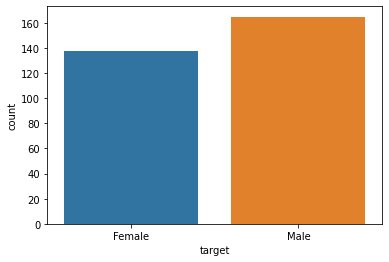

In [5]:
sns.countplot(data1['target'])
plt.xticks([0,1],['Female','Male'])
plt.show()

<AxesSubplot:>

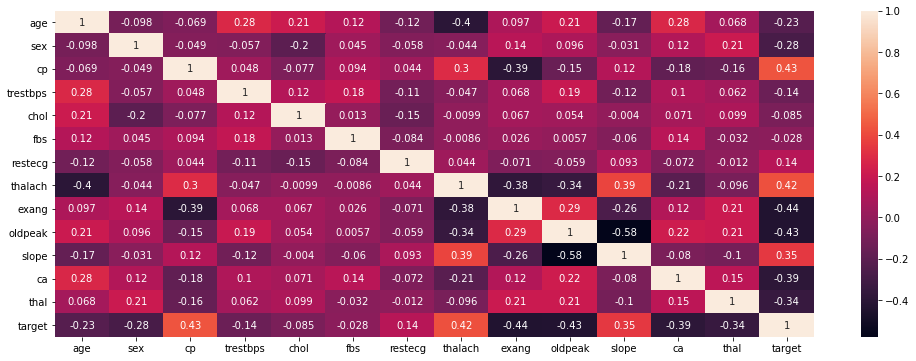

In [6]:
plt.figure(figsize=(17,6))
sns.heatmap(data1.corr(),annot=True)

C:\Users\Samruddhi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


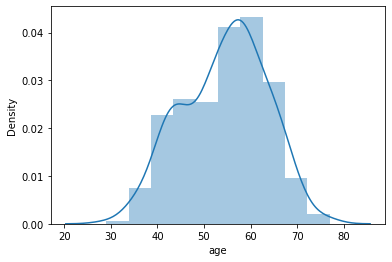

In [7]:
sns.distplot(data1['age'],bins=10)
plt.show()

In [8]:
np.shape(data1)

(303, 14)

### Train test spliting

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
y=data1.target
x=data1.drop('target',axis=1)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
print(x_train,x_test,y_train,y_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
3     56    1   1       120   236    0        1      178      0      0.8   
162   41    1   1       120   157    0        1      182      0      0.0   
112   64    0   2       140   313    0        1      133      0      0.2   
278   58    0   1       136   319    1        0      152      0      0.0   
209   59    1   0       140   177    0        1      162      1      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
66    51    1   2       100   222    0        1      143      1      1.2   
53    44    0   2       108   141    0        1      175      0      0.6   
79    58    1   2       105   240    0        0      154      1      0.6   
280   42    1   0       136   315    0        1      125      1      1.8   
8     52    1   2       172   199    1        1      162      0      0.5   

     slope  ca  thal  
3        2   0     2  
162      2   0     2  
112      2   0    

In [12]:
x_train.shape

(212, 13)

In [13]:
x_test.shape

(91, 13)

### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logreg = LogisticRegression()

In [16]:
logreg.fit(x_train,y_train)

C:\Users\Samruddhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred=logreg.predict(x_test)

In [18]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0], dtype=int64)

In [19]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[37,  9],
       [ 3, 42]], dtype=int64)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

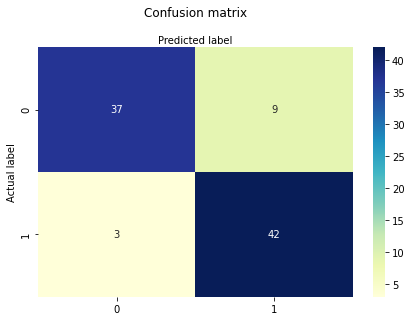

In [21]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8681318681318682
Precision: 0.8235294117647058
Recall: 0.9333333333333333


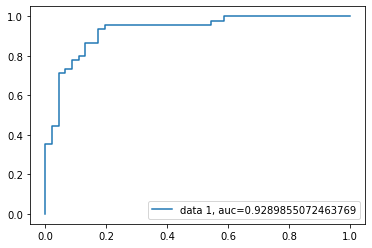

In [23]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### kNN

In [24]:
from sklearn.metrics import accuracy_score


In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(y_test,y_pred)
print(accuracy_score(y_test,y_pred))

69     1
300    0
220    0
134    1
7      1
      ..
203    0
237    0
29     1
161    1
266    0
Name: target, Length: 91, dtype: int64 [1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0
 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0]
0.7472527472527473


In [26]:
y_test

69     1
300    0
220    0
134    1
7      1
      ..
203    0
237    0
29     1
161    1
266    0
Name: target, Length: 91, dtype: int64

In [27]:
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0], dtype=int64)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[34 12]
 [11 34]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        46
           1       0.74      0.76      0.75        45

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



In [29]:
import scipy as sp

In [30]:
a=confusion_matrix(y_test, y_pred)
FP = a[0,1] 
FN =a[1,0] 
TP =  a[1,1] 
TN = a[0,0] 
print(a)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print(TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print(TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

[[34 12]
 [11 34]]
0.7555555555555555
0.7391304347826086


In [31]:
a

array([[34, 12],
       [11, 34]], dtype=int64)

In [32]:
ACC

0.7472527472527473

In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()  
model.fit(x_train, y_train)  
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8351648351648352


In [34]:
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score 

In [35]:
def plot_roc_curve(FPR,TPR):  
    plt.plot(FPR,TPR, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [36]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0], dtype=int64)

In [37]:
probs = model.predict_proba(x_test)

In [38]:
probs = probs[:, 1]  

In [39]:
FPR,TPR,thresholds = roc_curve(y_test, probs)

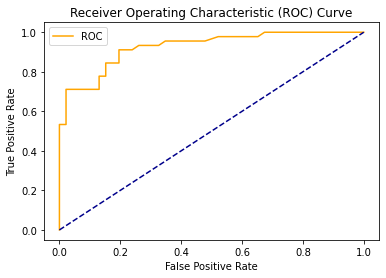

In [40]:
plot_roc_curve(FPR,TPR)

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
model = RandomForestClassifier()  
model.fit(x_train, y_train)  
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8461538461538461


In [43]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[35 11]
 [ 3 42]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83        46
           1       0.79      0.93      0.86        45

    accuracy                           0.85        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.85      0.85        91



In [44]:
d=confusion_matrix(y_test, y_pred)
FP = d[0,1] 
FN =d[1,0] 
TP =  d[1,1] 
TN = d[0,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [45]:
a

array([[34, 12],
       [11, 34]], dtype=int64)

In [46]:
ACC

0.8461538461538461

In [47]:
y_pred


array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0], dtype=int64)

In [48]:
probs = model.predict_proba(x_test)

In [49]:
probs = probs[:, 1]  

In [50]:
FPR,TPR,thresholds = roc_curve(y_test, probs)

In [51]:
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score  

In [52]:
def plot_roc_curve(FPR,TPR):  
    plt.plot(FPR,TPR, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [53]:
def plot_roc_curve(FPR,TPR):  
    plt.plot(FPR,TPR, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [54]:
def plot_roc_curve(FPR,TPR):  
    fpr, tpr, _ = metrics.roc_curve(y_test,probs)
    auc = metrics.roc_auc_score(y_test,probs)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.plot(FPR,TPR, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve of Random Forest')
    plt.legend()
    plt.show()

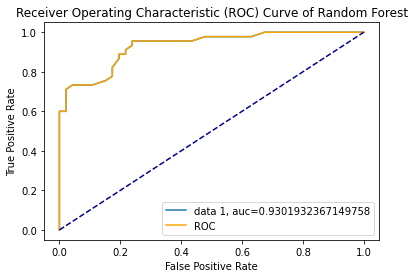

In [55]:
plot_roc_curve(FPR,TPR)

### Decision Tree

In [56]:
###Import Required libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [57]:
##class count of reponse variable
data1['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [58]:
## Training 
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(x_train, y_train) 

DecisionTreeClassifier()

In [59]:
##Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[35 11]
 [ 3 42]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83        46
           1       0.79      0.93      0.86        45

    accuracy                           0.85        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.85      0.85        91



In [60]:
classifier = DecisionTreeClassifier()

# Train Decision Tree Classifer
classifier = classifier.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = classifier.predict(x_test)

In [61]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0], dtype=int64)

In [62]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
classifier = classifier.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = classifier.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8241758241758241


In [63]:
b=confusion_matrix(y_test, y_pred)
FP = b[0,1] 
FN =b[1,0] 
TP =  b[1,1] 
TN = b[0,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [64]:
ACC

0.8241758241758241

In [65]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1], dtype=int64)

In [66]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
classifier = classifier.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = classifier.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8241758241758241


In [67]:
#x_test=x_test.drop('Q.N.',axis=1)
probs =classifier.predict_proba(x_test)

In [68]:
probs = probs[:, 1]  

In [69]:
FPR,TPR,thresholds = roc_curve(y_test, probs)
FPR,TPR,thresholds

(array([0.        , 0.        , 0.13043478, 0.17391304, 0.23913043,
        0.34782609, 0.34782609, 0.56521739, 1.        ]),
 array([0.        , 0.28888889, 0.71111111, 0.8       , 0.88888889,
        0.93333333, 0.97777778, 1.        , 1.        ]),
 array([2.        , 1.        , 0.84482759, 0.72413793, 0.70588235,
        0.35714286, 0.23076923, 0.125     , 0.        ]))

In [70]:
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score  

In [71]:
def plot_roc_curve(FPR,TPR):  
    fpr, tpr, _ = metrics.roc_curve(y_test,probs)
    auc = metrics.roc_auc_score(y_test,probs)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.plot(FPR,TPR, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve of Decision Tree')
    plt.legend()
    plt.show()

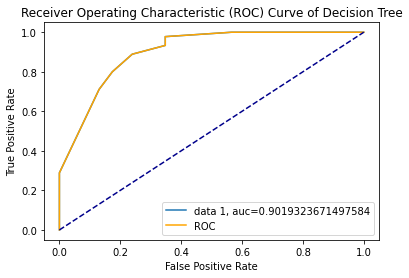

In [72]:
plot_roc_curve(FPR,TPR)

# SVM

In [73]:
X=data1.drop('target',axis=1).values    
y=data1['target'].values

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=100)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (212, 13) (212,)
Test set: (91, 13) (91,)


In [86]:
from sklearn import svm
SVM = svm.SVC(kernel='rbf')
SVM.fit(X_train, y_train) 

SVC()

In [87]:
SVM_yhat = SVM.predict(X_test)
SVM_yhat [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [88]:
from sklearn import metrics

SVM_Score = metrics.accuracy_score(y_test, SVM_yhat)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, SVM.predict(X_train)))
print("SVM's Accuracy: ", SVM_Score)

Train set Accuracy:  0.6320754716981132
SVM's Accuracy:  0.6263736263736264


In [89]:
y_test

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0], dtype=int64)

In [90]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1], dtype=int64)

In [91]:
from sklearn.metrics import classification_report,confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  


[[35 11]
 [ 5 40]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.81        46
           1       0.78      0.89      0.83        45

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [93]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8241758241758241
Precision: 0.7843137254901961
Recall: 0.8888888888888888


In [94]:
def plot_roc_curve(FPR,TPR):  
    fpr, tpr, _ = metrics.roc_curve(y_test,probs)
    auc = metrics.roc_auc_score(y_test,probs)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.plot(FPR,TPR, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve of Decision Tree')
    plt.legend()
    plt.show()

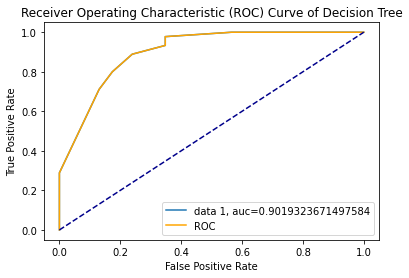

In [95]:
plot_roc_curve(FPR,TPR)